In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd drive

/content/drive


In [ ]:
!ls

MyDrive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
!ls

'Colab Notebooks'   Dicom


In [ ]:
!pip install pydicom


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [ ]:
import pydicom

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
pydicom_file = pydicom.read_file('Dicom/ID_0002_AGE_0074_CONTRAST_1_CT.dcm')

In [ ]:
pydicom_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.3023.4012.236286345671461494122464567634
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.3023.4012.236286345671461494122464567634
(0008, 0020) Study Date                          DA: '19980316'
(0008, 0021) Serie

In [ ]:
pydicom_file[0x0028,0x0107]

(0028, 0107) Largest Image Pixel Value           US: 2413

In [ ]:
pydicom_file.AcquisitionTime

'075044.917000'

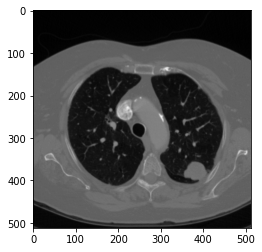

In [ ]:
ct = pydicom_file.pixel_array
plt.figure()
plt.imshow(ct,cmap='gray')

In [ ]:
path_ct = Path('Dicom')

In [ ]:
all_files = list(path_ct.glob("*"))

In [ ]:
all_files

[PosixPath('Dicom/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0005_AGE_0048_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0003_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0001_AGE_0069_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0007_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0010_AGE_0060_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0002_AGE_0074_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0006_AGE_0075_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0009_AGE_0048_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0004_AGE_0056_CONTRAST_1_CT.dcm'),
 PosixPath('Dicom/ID_0008_AGE_0051_CONTRAST_1_CT.dcm')]

In [ ]:
ct_data=[]

for path in all_files:
  data = pydicom.read_file(path)
  ct_data.append(data)
  


In [ ]:
ct_data

[Dataset.file_meta -------------------------------
 (0002, 0000) File Meta Information Group Length  UL: 194
 (0002, 0001) File Meta Information Version       OB: b'\x00\x01'
 (0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
 (0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
 (0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
 (0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
 (0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
 -------------------------------------------------
 (0008, 0000) Group Length                        UL: 430
 (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
 (0008, 0016) SOP Class UID                       UI: CT Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.

In [ ]:
for slice in ct_data[:10]:
  print(slice.SliceLocation)

-247.5
-144
-260
-220
-174
-606
104
-260
-187
116


In [ ]:
ct_data_sorted = sorted(ct_data , key= lambda slice: slice.SliceLocation)
for slice in ct_data_sorted[:10]:
  print(slice.SliceLocation)

-606
-260
-260
-247.5
-220
-187
-174
-144
-51.250
104


In [ ]:
all_slice =[]
for slice in ct_data_sorted:
  all_slice.append(slice.pixel_array)

In [ ]:
len(all_slice)

11

In [ ]:
all_slice

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[ 0,  0,  0, ..., 21, 28, 31],
        [ 0,  0,  0, ..., 30, 32, 24],
        [ 0,  0,  0, ..., 30, 26, 16],
        ...,
        [ 0,  0,  0, ..., 64, 41, 26],
        [ 0,  0,  0, ..., 18, 14, 14],
        [ 0,  0,  0, ..., 19, 15, 14]], dtype=uint16),
 array([[ 0,  0,  0, ..., 21, 28, 31],
        [ 0,  0,  0, ..., 30, 32, 24],
        [ 0,  0,  0, ..., 30, 26, 16],
        ...,
        [ 0,  0,  0, ..., 64, 41, 26],
        [ 0,  0,  0, ..., 18, 14, 14],
        [ 0,  0,  0, ..., 19, 15, 14]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[30, 37, 13,

IndexError: ignored

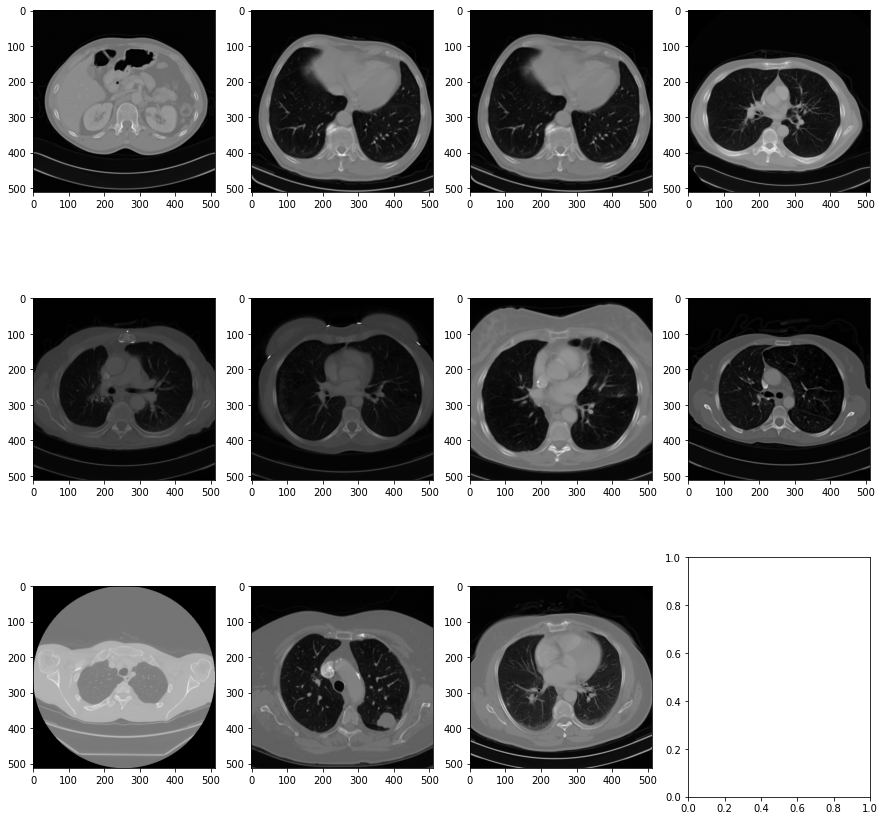

In [ ]:
fig , axis = plt.subplots(3,4,figsize = (15,15))
slice_counter = 0
for i in range (3):
  for j in range (4):
    axis[i][j].imshow(all_slice[slice_counter],cmap = 'gray')
    slice_counter +=1